In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.layers import Dense, Activation, Flatten, Convolution2D, Dropout
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
import shutil
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv(r'C:\Users\rana ahmed\Desktop\Senior_2\deepLearingproject\Leaf-Classification\leaf-classification\train.csv')
test = pd.read_csv(r'C:\Users\rana ahmed\Desktop\Senior_2\deepLearingproject\Leaf-Classification\leaf-classification\test.csv')


# Preparing classes for labeling
traindata = train[['id','species']].copy()
traindata['id'] = traindata['id'].astype(str)
traindata['label'] = LabelEncoder().fit_transform(traindata['species'])


# Loading Images and Linking Labels
images = r'C:\Users\rana ahmed\Desktop\Senior_2\deepLearingproject\Leaf-Classification\leaf-classification\images'

# List comprehension to load images and link labels
imgs = [Image.open(os.path.join(images, i)).convert('1') 
        for i in sorted(os.listdir(images)) 
        if i.split('.')[0] in traindata['id'].values]

# Matching labels using list comprehension
labels = [traindata[traindata['id'] == i.split('.')[0]]['label'].values[0] 
          for i in sorted(os.listdir(images)) 
          if i.split('.')[0] in traindata['id'].values]

# Displaying information
print(f"We have {len(imgs)} images in the dataset")
print(f"Dataset have {len(np.unique(labels))} labels ")

We have 990 images in the dataset
Dataset have 99 labels 


In [3]:
# Preparing classes for labeling
testdata = test[['id']].copy()
testdata['id'] = testdata['id'].astype(str)

# List comprehension to load images and link labels
imgs2 = [Image.open(os.path.join(images, i)).convert('1') 
        for i in sorted(os.listdir(images)) 
        if i.split('.')[0] in testdata['id'].values]

# Displaying information
print(f"We have {len(imgs2)} images in the dataset")

We have 594 images in the dataset


In [4]:
destination_dir = r'Train'
Test_destination_dir = r'Test'

In [5]:
def load_images_as_arrays(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Filter by file extensions
            img = Image.open(os.path.join(directory, filename))
            img_array = np.array(img)
            images.append(img_array)
    return images

images_as_array = load_images_as_arrays(destination_dir)
print(len(images_as_array))  # Check the number of loaded images
print(images_as_array)
testimages_as_array = load_images_as_arrays(Test_destination_dir)
print(len(testimages_as_array))  # Check the number of loaded images
print(testimages_as_array)

990
[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 

In [6]:
labels_np = np.array(labels)
labels_np

array([ 3, 54, 20,  1, 45,  3,  9, 13,  2, 66, 59, 62, 79,  6, 17, 43, 83,
       26,  1, 12, 49, 71, 89, 58, 88, 93, 39, 42, 15, 38, 55, 15, 93,  4,
       90, 88, 55, 40, 55, 17, 34, 94, 34, 57, 92, 81, 26, 92, 60, 89, 49,
       89, 79, 30, 65, 58,  4, 19,  4, 76, 82, 74, 71, 21, 54, 13, 16, 72,
       78, 68, 62, 61, 25, 72,  7, 12, 18, 77, 90, 62, 14,  3, 78, 65, 37,
       27, 50, 95, 98, 60, 72, 58, 38, 87, 20, 93, 19,  7, 83, 50,  3, 32,
       91, 77,  7, 64, 61, 69, 23, 76, 65, 48, 41, 92, 20, 91, 18,  4, 70,
        9,  9, 29, 85, 67,  0, 35, 98, 84, 91, 90, 31, 53, 39, 24, 85, 96,
       17,  7, 11, 96, 39, 36, 56, 90, 79, 45, 64, 97, 41, 19, 74, 11, 10,
       62, 95, 28, 35, 96, 10,  7, 68,  7, 93, 34, 42, 68, 41, 14, 22, 58,
       12, 71, 27, 98, 72, 91, 72,  3, 43, 19, 61, 75, 20, 81, 63, 67, 56,
       26, 47, 11, 31, 60, 57, 62, 66, 19, 75, 71, 97, 94, 13, 75, 95, 32,
       50, 97, 52, 87, 32, 72,  3, 47, 77, 48, 33, 73, 64, 49, 68, 52, 43,
       94, 77, 68, 50, 47

In [7]:
def resize_images_and_greyscale(images_array, new_size):
    resized_images = []
    for img in images_array:
        pil_img = Image.fromarray(img)
        # Resize
        resized_img = pil_img.resize(new_size)
        # Convert to grayscale
        grayscale_img = resized_img.convert('L')
        resized_images.append(np.array(grayscale_img))
    return resized_images

# Resize images in the array to a new size (e.g., (64, 64)) and convert to greyscale
resized_images = resize_images_and_greyscale(images_as_array, (64, 64))
testresized_images = resize_images_and_greyscale(testimages_as_array, (64, 64))
# Check the shape of the resized and grayscale images
print("Shape of the first image:", resized_images[0].shape)
print("Shape of the first image:", testresized_images[0].shape)

Shape of the first image: (64, 64)
Shape of the first image: (64, 64)


In [8]:
resized_images = np.expand_dims(resized_images, axis=-1)
testresized_images = np.expand_dims(testresized_images, axis=-1)
print("Shape of the first image:", resized_images[0].shape)

Shape of the first image: (64, 64, 1)


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(resized_images, labels_np, test_size=0.2, random_state=42,stratify=labels_np)

print(f"Data have {len(X_train)} images for training")
print(f"Data have {len(X_test)} images for testing")
print(f"Training data consist of  {len(np.unique(Y_train))} classes ")
print(f"Testing data consist of {len(np.unique(Y_test))} classes")

Data have 792 images for training
Data have 198 images for testing
Training data consist of  99 classes 
Testing data consist of 99 classes


In [10]:
# Display the new shapes after augmentation
print("Shapes befor augmentation:")
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

Shapes befor augmentation:
X_train shape: (792, 64, 64, 1)
Y_train shape: (792,)
X_test shape: (198, 64, 64, 1)
Y_test shape: (198,)


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

Y_train_reshaped = Y_train.reshape(-1, 1)
Y_test_reshaped= Y_test.reshape(-1, 1)
# Create separate instances of ImageDataGenerator for each dataset
datagen_train = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen_test = ImageDataGenerator()

# Reshape your datasets to have 4 dimensions (batch,height, width, channels)
X_train_reshaped = X_train.reshape(-1,64, 64, 1)
X_test_reshaped = X_test.reshape(-1,64, 64, 1)

print(X_test_reshaped.shape)


# Fit the ImageDataGenerator on your training data
datagen_train.fit(X_train_reshaped)


# Generate augmented images for each dataset
num_augmented_images = 1000  # Choose the number of augmented images to generate for each set

# Augment the training set
augmented_images_train = []
augmented_labels_train = []
for images, labels in datagen_train.flow(X_train_reshaped, Y_train_reshaped, batch_size=num_augmented_images):
    augmented_images_train.append(images)
    augmented_labels_train.append(labels[:len(images)])  # Align labels with augmented images

    if len(augmented_images_train) * num_augmented_images >= len(X_train_reshaped):
        break



# Convert lists to arrays
augmented_images_train = np.concatenate(augmented_images_train, axis=0)
augmented_labels_train = np.concatenate(augmented_labels_train, axis=0)


# Ensure labels have the appropriate shape for concatenation
augmented_labels_train = augmented_labels_train.reshape(-1,1)
print(augmented_labels_train.shape)


X_train_final = np.vstack((X_train_reshaped, augmented_images_train))
Y_train_final = np.vstack((Y_train_reshaped, augmented_labels_train))
print(Y_train_final.shape)


# Augment the test set (no augmentation here, just reshaping)
datagen_test.fit(X_test_reshaped)
X_test_final = X_test_reshaped
Y_test_final = Y_test

# Display the new shapes after augmentation
print("Shapes after augmentation:")
print("X_train_final shape:", X_train_final.shape)
print("Y_train_final shape:", Y_train_final.shape)
print("X_test_final shape:", X_test_final.shape)
print("Y_test_final shape:", Y_test_final.shape)

print("Number of samples:")
print(f"Data have {len(X_train_final)} images for training")
print(f"Data have {len(X_test_final)} images for validation")
print(f"Training data consist of  {len(np.unique(Y_train_final))} classes ")
print(f"Validatingn data consist of {len(np.unique(Y_test_final))} classes")

(198, 64, 64, 1)
(792, 1)
(1584, 1)
Shapes after augmentation:
X_train_final shape: (1584, 64, 64, 1)
Y_train_final shape: (1584, 1)
X_test_final shape: (198, 64, 64, 1)
Y_test_final shape: (198,)
Number of samples:
Data have 1584 images for training
Data have 198 images for validation
Training data consist of  99 classes 
Validatingn data consist of 99 classes


In [16]:
# Then, create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_final, Y_train_final))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_final, Y_test_final))

In [17]:
# Batch and shuffle the datasets
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(len(X_train)).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

print(f"length of train dataset is {len(train_dataset)}")
print(f"length of Testing dataset is {len(test_dataset)}")

length of train dataset is 50
length of Testing dataset is 7


In [18]:
# Define the CNN model using Keras Functional API
Model1aug = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(64, 64, 1)), 
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu',strides=(1, 1), padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu',strides=(1, 1), padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(256, (3, 3),activation='relu',strides=(1, 1), padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(512, (3, 3),activation='relu',strides=(1, 1), padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
     tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(99, activation='softmax')
])



In [19]:
Model1aug.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 128)       

In [20]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import regularizers


def train_model(Train_dataset,Validation_dataset, batch_size, optimizer, learning_rate, weight_decay,num_epochs):

    Model1aug
    if optimizer == 'SGD':
        optimizer = SGD(learning_rate=learning_rate, decay=weight_decay)
    elif optimizer == 'Adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer == 'RMSprop':
        optimizer = RMSprop(learning_rate=learning_rate, decay=weight_decay)

    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
    Model1aug.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])


    history = Model1aug.fit(Train_dataset, epochs=num_epochs,validation_data=Validation_dataset, batch_size=batch_size)
       

    return history

In [21]:
print('Result for adam optimizer,learning_rate=0.001,epoch =30, weight_decay =0.001')

trial1_aug = train_model(train_dataset,test_dataset,32,'Adam',0.001,0.001,60)

Result for adam optimizer,learning_rate=0.001,epoch =30, weight_decay =0.001
Epoch 1/60


50/50 [==============================] - 12s 216ms/step - loss: 7.2100 - accuracy: 0.0082 - val_loss: 4.5876 - val_accuracy: 0.0202
Epoch 2/60
50/50 [==============================] - 10s 209ms/step - loss: 4.5881 - accuracy: 0.0152 - val_loss: 4.5499 - val_accuracy: 0.0354
Epoch 3/60
50/50 [==============================] - 10s 201ms/step - loss: 4.4900 - accuracy: 0.0227 - val_loss: 4.1623 - val_accuracy: 0.0505
Epoch 4/60
50/50 [==============================] - 10s 204ms/step - loss: 4.2338 - accuracy: 0.0442 - val_loss: 3.7781 - val_accuracy: 0.1566
Epoch 5/60
50/50 [==============================] - 10s 202ms/step - loss: 3.8746 - accuracy: 0.0934 - val_loss: 3.2461 - val_accuracy: 0.2222
Epoch 6/60
50/50 [==============================] - 10s 210ms/step - loss: 3.5275 - accuracy: 0.1503 - val_loss: 2.7597 - val_accuracy: 0.2879
Epoch 7/60
50/50 [==============================] - 10s 197ms/step - loss: 3.1845 - accuracy: 0.2083 - val_loss: 2.3289 - val_accuracy: 0.3788
Epoch 8/60

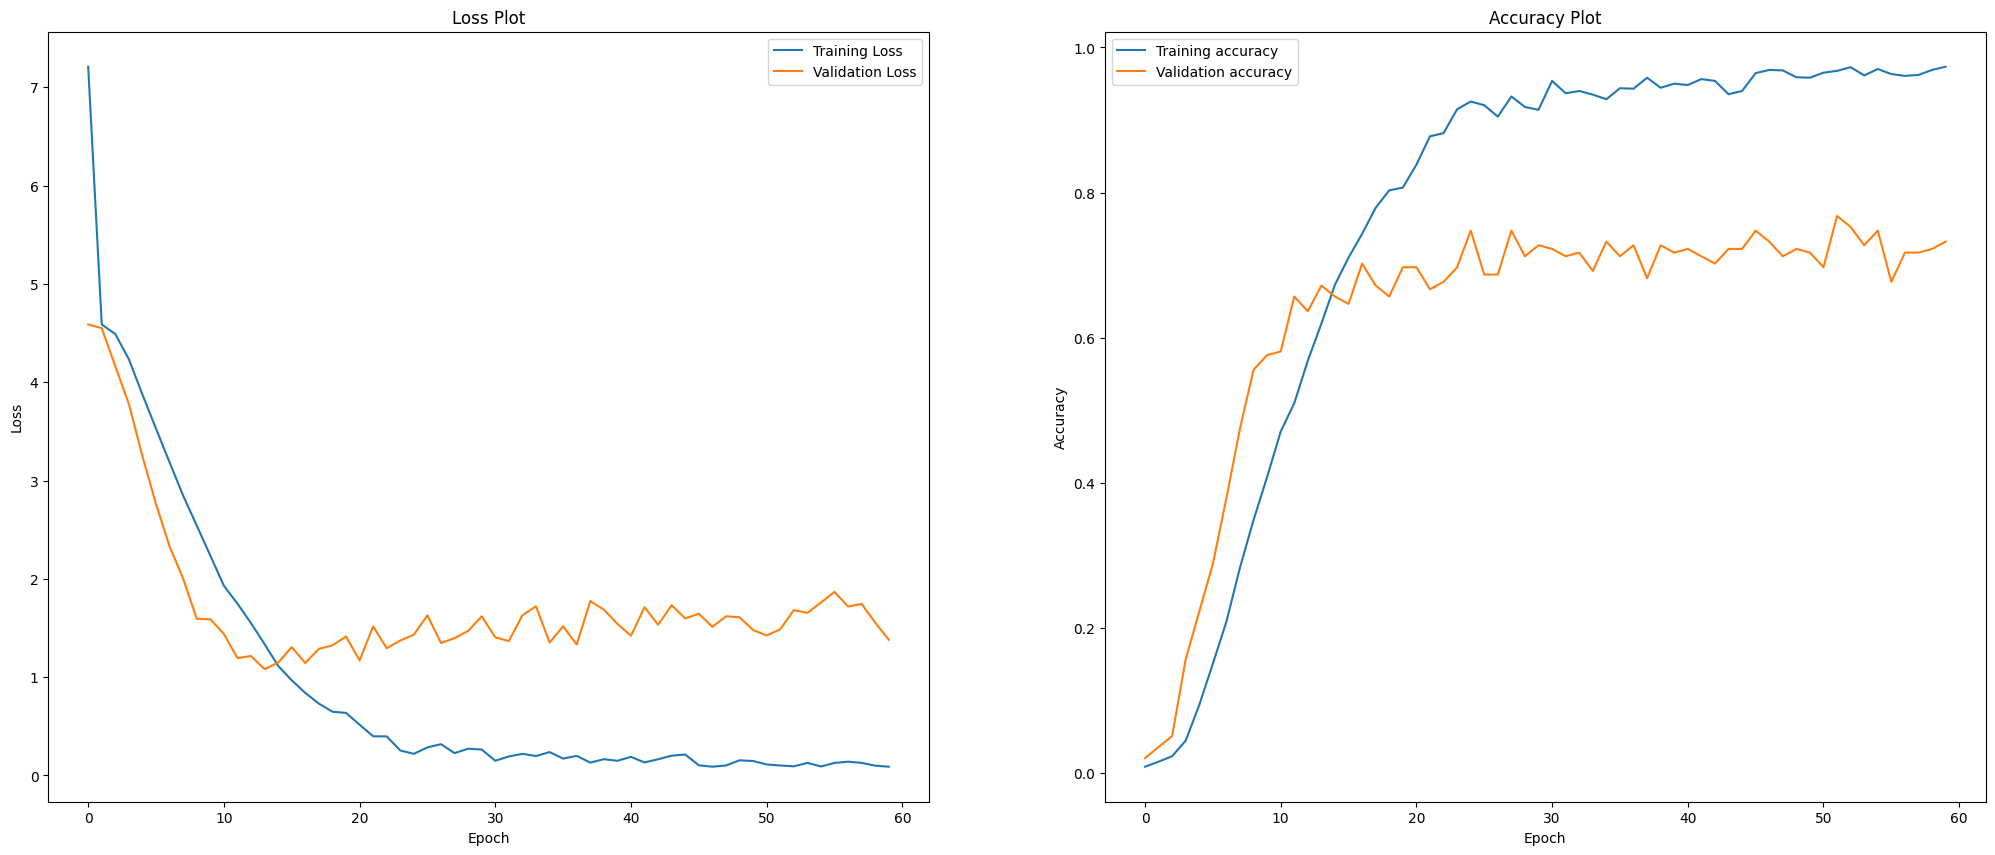

In [22]:
fig,ax=plt.subplots(1,2,figsize=(25,10))
ax[0].plot(trial1_aug.history["loss"],label="Training Loss")
ax[0].plot(trial1_aug.history["val_loss"],label="Validation Loss")
ax[0].set_title("Loss Plot")
ax[0].set_ylabel("Loss")
ax[0].set_xlabel("Epoch")
ax[0].legend()

ax[1].plot(trial1_aug.history["accuracy"],label="Training accuracy")
ax[1].plot(trial1_aug.history["val_accuracy"],label="Validation accuracy")
ax[1].set_title("Accuracy Plot")
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("Epoch")
ax[1].legend()

plt.show()

In [23]:
def test_results(model, testing_data):

    test_loss, test_acc = model.evaluate(testing_data, verbose=2)
    print('Test loss: {loss:.2f}'.format(loss=test_loss))
    print('Test accuracy: {acc:.2f}%'.format(acc=test_acc*100))
    return

test_results(Model1aug,test_dataset)

7/7 - 0s - loss: 1.3807 - accuracy: 0.7323 - 225ms/epoch - 32ms/step
Test loss: 1.38
Test accuracy: 73.23%
